> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Investigate a Dataset "TMDb Movie Data"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

## Introduction
This data set contains information about 10.8K movies collected from The Movie Database (TMDb), including user ratings and revenue, release date and other data in 21 Columns 

In [99]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.



# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import seaborn as sns
from datetime import datetime as dt

% matplotlib inline

# import data and check first 5 columns

df = pd.read_csv ("tmdb-movies.csv")
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


### After reviewing the data, there are a lot of questions to be asked as below:- 

1- Who are the directors with top numbers of movies

2- What is the change in movie production numbers over years

3- What is the relationship between Budget and Revenue

4- What is the runtime movie distribution

5- Which month has the most average revenue

6- What is the relationship between budget and revenue over years

7- Which Month has the biggest number of movies released 

8- What are the top 5 movies in terms of budget, revenue and popularity

9- Which movies have the highest profit

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

First we need to clean the data, so to check rows and columns for data that should be dropped or cleaned.

In [100]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
#data already loaded before
#checking data shape
df.shape

(10866, 21)

### Check for duplicated lines

In [101]:
df.duplicated().sum()

1

### Check Data for more detailes 

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [103]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [104]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

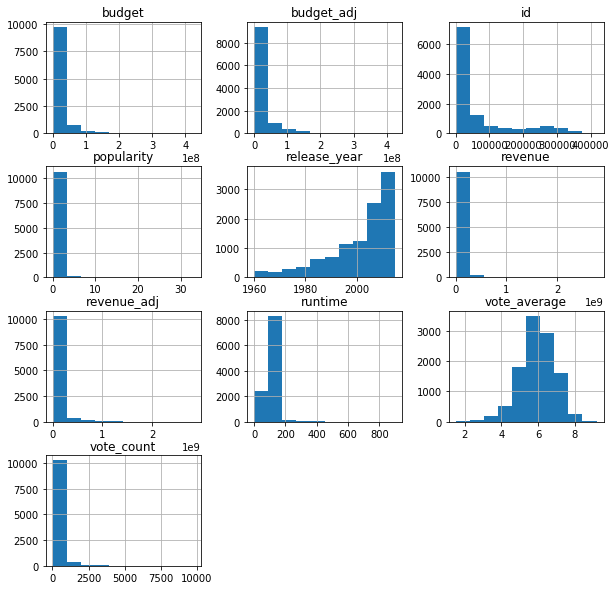

In [105]:
df.hist(figsize=(10,10));


#### Data Wrangling Conclusion


By the end of data Wrangling, below actions should be done in data cleaning 

1- Remove duplicated lines

2- Remove unneeded columns

3- Remove lines with non-valid data ( like zero screen budget or revenue or runtime)

4- Remove lines with NA Values

5- Change release_date to date instead of strings



> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning

## 1- Remove duplicated lines

In [106]:
df.drop_duplicates(inplace = True)

## 2- Remove unneeded columns

In [107]:
df.drop(['id', 'imdb_id', 'cast', 'homepage', 'tagline', 'keywords', 'overview','production_companies'], axis = 1, inplace = True)

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 13 columns):
popularity        10865 non-null float64
budget            10865 non-null int64
revenue           10865 non-null int64
original_title    10865 non-null object
director          10821 non-null object
runtime           10865 non-null int64
genres            10842 non-null object
release_date      10865 non-null object
vote_count        10865 non-null int64
vote_average      10865 non-null float64
release_year      10865 non-null int64
budget_adj        10865 non-null float64
revenue_adj       10865 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.2+ MB


## 3- Remove lines with non-valid data

In [109]:
df = df[df['budget'] != 0]

In [110]:
df = df[df['revenue'] != 0]

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3854 non-null float64
budget            3854 non-null int64
revenue           3854 non-null int64
original_title    3854 non-null object
director          3853 non-null object
runtime           3854 non-null int64
genres            3854 non-null object
release_date      3854 non-null object
vote_count        3854 non-null int64
vote_average      3854 non-null float64
release_year      3854 non-null int64
budget_adj        3854 non-null float64
revenue_adj       3854 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.5+ KB


## 4- Remove lines with NA Values

In [112]:
df.dropna(axis = 0 , inplace = True,subset = ['director'])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3853 non-null float64
budget            3853 non-null int64
revenue           3853 non-null int64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
genres            3853 non-null object
release_date      3853 non-null object
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
budget_adj        3853 non-null float64
revenue_adj       3853 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 421.4+ KB


## 5- Change release_date to date

In [114]:
df.release_date = pd.to_datetime(df['release_date'])

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3853 entries, 0 to 10848
Data columns (total 13 columns):
popularity        3853 non-null float64
budget            3853 non-null int64
revenue           3853 non-null int64
original_title    3853 non-null object
director          3853 non-null object
runtime           3853 non-null int64
genres            3853 non-null object
release_date      3853 non-null datetime64[ns]
vote_count        3853 non-null int64
vote_average      3853 non-null float64
release_year      3853 non-null int64
budget_adj        3853 non-null float64
revenue_adj       3853 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(5), object(3)
memory usage: 421.4+ KB


#### Note: More than 6K lines was with missing budget or revenue data

In [116]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.



<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



In [117]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3853.000000,3.853000e+03,3.853000e+03,3853.000000,3853.000000,3853.000000,3853.000000,3.853000e+03,3.853000e+03
mean,1.191825,3.721227e+07,1.077117e+08,109.208928,527.854399,6.168258,2001.259278,4.425038e+07,1.370974e+08
std,1.475258,4.221035e+07,1.765554e+08,19.912913,880.031643,0.795001,11.283517,4.481043e+07,2.161299e+08
min,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462609,1.000000e+07,1.360940e+07,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.840420e+07
50%,0.797723,2.400000e+07,4.480678e+07,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.174274e+07
75%,1.368403,5.000000e+07,1.242721e+08,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632752e+08
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


### 1- Who are the directors with top numbers of movies

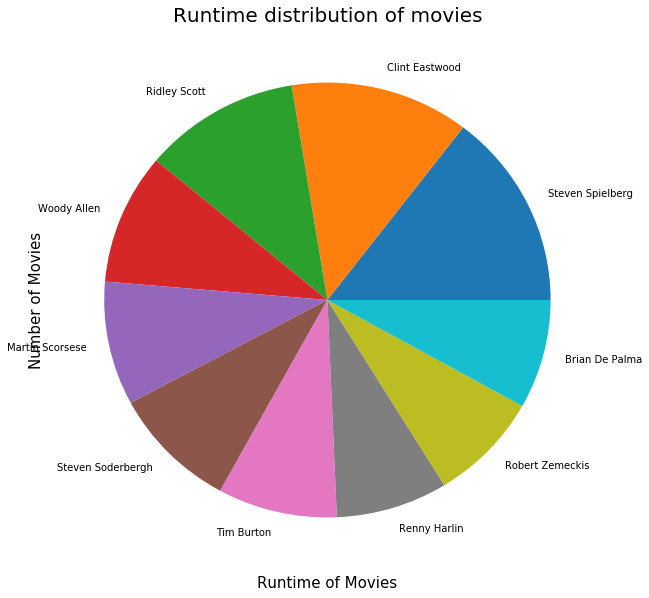

In [118]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.


df['director'].value_counts().sort_values(ascending=False).head(10).plot(kind = 'pie', figsize= (10,10));
plt.xlabel('Runtime of Movies',size= 15);
plt.ylabel('Number of Movies',size= 15);
plt.title('Runtime distribution of movies',size= 20);



In [119]:
df.groupby('director')['revenue'].mean().sort_values(ascending=False).head()

director
Chris Buck|Jennifer Lee     1.274219e+09
Kyle Balda|Pierre Coffin    1.156731e+09
Irwin Winkler               1.106280e+09
Lee Unkrich                 1.063172e+09
David Yates                 1.038574e+09
Name: revenue, dtype: float64

In [120]:
df['director'].value_counts().head(10)

Steven Spielberg     27
Clint Eastwood       24
Ridley Scott         21
Woody Allen          18
Martin Scorsese      17
Steven Soderbergh    17
Tim Burton           16
Renny Harlin         15
Robert Zemeckis      15
Brian De Palma       15
Name: director, dtype: int64

#### Steven Spielberg is the top director with 27 Movies, then clint eastwood, data is represented in the piechart

### 2- What is the change in movie production numbers over years 

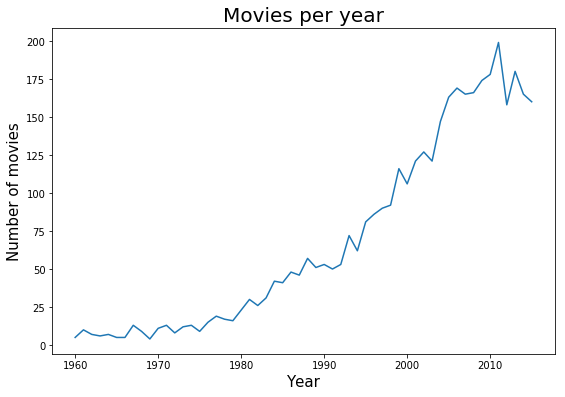

In [121]:
year_ind = df['release_year'].value_counts().sort_index();

plt.figure(figsize=(9,6))
plt.plot(year_ind);
plt.title('Movies per year',size= 20);
plt.xlabel('Year',size= 15);
plt.ylabel('Number of movies',size= 15);

#### number of movies release increase over time incrementally 

### 3- What is the relationship between Budget and Revenue

In [122]:
def corfun(column1, column2):
    return df[column1].corr(df[column2])
    

    
corfun('budget','revenue')

0.68852642815341825

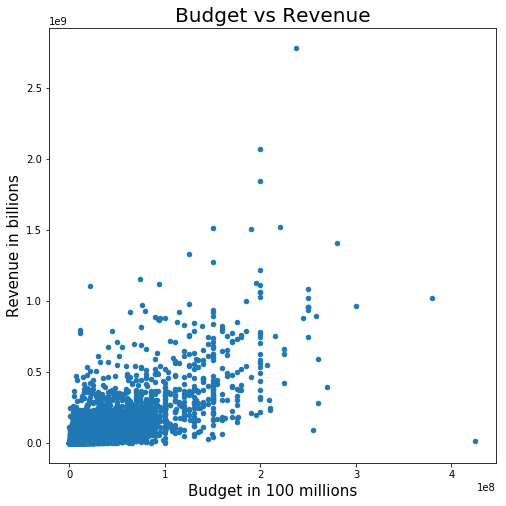

In [123]:
df.plot(x='budget',y='revenue',kind='scatter',figsize=(8,8));
plt.title('Budget vs Revenue',size= 20)
plt.xlabel('Budget in 100 millions',size= 15);
plt.ylabel('Revenue in billions',size= 15);


##### There is a Positive relationship between budget and revenue appearing in the scatter chart and in the Correlation equation above (.688)

### 4- What is the runtime movie distribution

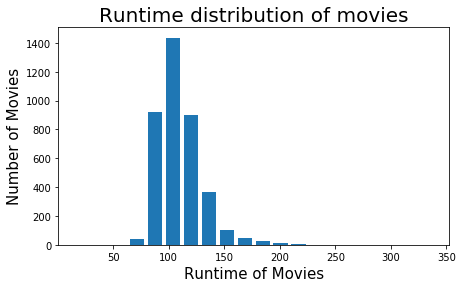

In [124]:

plt.figure(figsize=(7,4))

plt.xlabel('Runtime of Movies',size= 15)
plt.ylabel('Number of Movies',size= 15)
plt.title('Runtime distribution of movies',size= 20)


plt.hist(df['runtime'], rwidth = .8, bins =20)

plt.show()

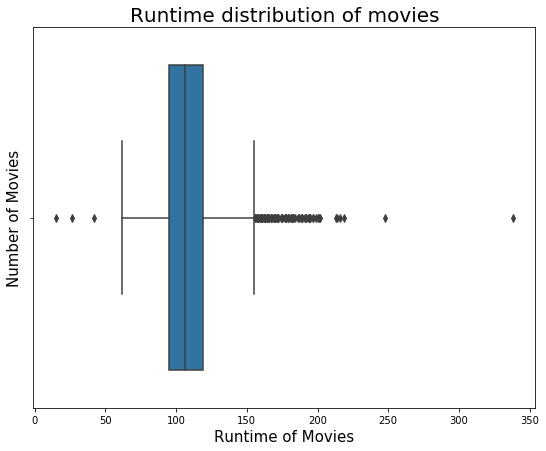

In [125]:
plt.figure(figsize=(9,7))
sns.boxplot(df['runtime'])

plt.xlabel('Runtime of Movies',size= 15)
plt.ylabel('Number of Movies',size= 15)
plt.title('Runtime distribution of movies',size= 20)

plt.show()

In [126]:
corfun('runtime','revenue')

0.25077777886979419

#### 50% of movies are between 95 to 119 Min
#### there is no significant correlation between runtime and revenue

## 5- Which month has the most average revenue

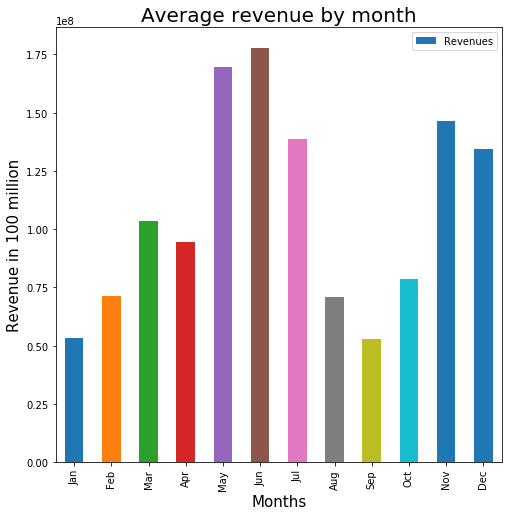

In [127]:
df['movie_month']=df['release_date'].dt.month

revenue_month = df.groupby('movie_month')['revenue'].mean()
df2=pd.DataFrame()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
df2['Months']=months
df2['Revenues'] = list(revenue_month.get_values())
df2.plot(x='Months',y='Revenues',kind='bar',figsize=(8,8));
plt.title('Average revenue by month',size=20);
plt.ylabel('Revenue in 100 million',size=15);
plt.xlabel('Months',size=15);

#### May and June are the top months in terms of average revenue then Nov and Dec, there might be a correlation with the holiday's seasons

### 6- What is the relationship between budget and revenue over years

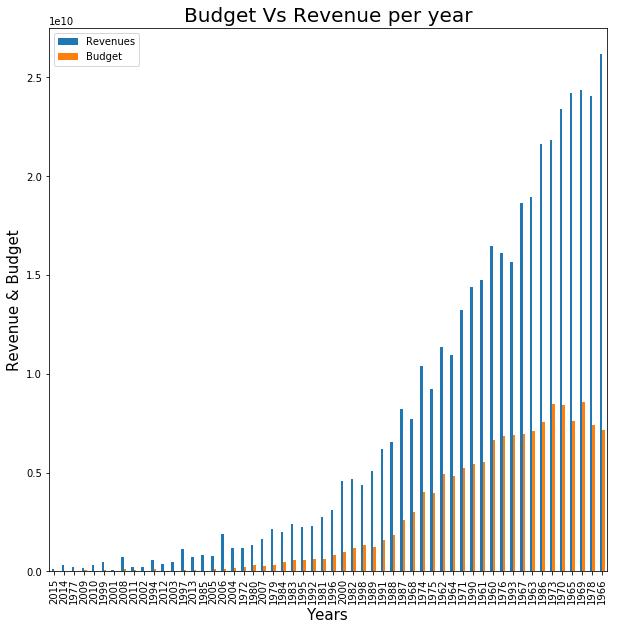

In [128]:
rev_per_year = df.groupby('release_year')['revenue'].sum()
bud_per_year = df.groupby('release_year')['budget'].sum()

df3=pd.DataFrame()
years =df.release_year.unique()

df3['Years']=years
df3['Revenues'] = list(rev_per_year.get_values())
df3['Budget'] = list(bud_per_year.get_values())

df3.plot(x='Years',y=['Revenues','Budget'],kind='bar',figsize=(10,10));
plt.title('Budget Vs Revenue per year',size=20);
plt.ylabel('Revenue & Budget',size=15);
plt.xlabel('Years',size=15);




#### the postive correlation between budget and revenue is clear over years

### 7- Which Month has the biggest number of movies released 

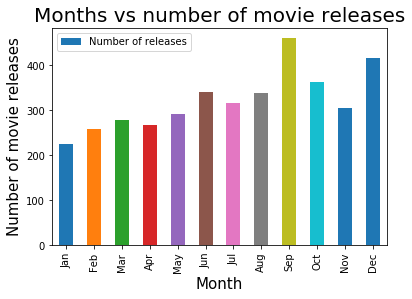

In [129]:
numreleases_month= df.movie_month.value_counts().sort_index()
df4=pd.DataFrame()
df4['Months']=months
df4['Number of releases']=numreleases_month.get_values()
df4.plot(x='Months',y='Number of releases',kind='bar');
plt.title('Months vs number of movie releases', size = 20);
plt.ylabel('Number of movie releases', size = 15);
plt.xlabel('Month', size = 15);

#### Sep is the highest number of movie releases over time, then dec in the second place

### 8- What are the top 5 movies in terms of budget, revenue and popularity

In [130]:

df.nlargest(5,'revenue')

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_month
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,12
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,11
4361,7.637767,220000000,1519557910,The Avengers,Joss Whedon,143,Science Fiction|Action|Adventure,2012-04-25,8903,7.3,2012,2.089437e+08,1.443191e+09,4
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6


In [131]:
df.nlargest(5,'budget')

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_month
2244,0.250540,425000000,11087569,The Warrior's Way,Sngmoo Lee,100,Adventure|Fantasy|Action|Western|Thriller,2010-12-02,74,6.4,2010,4.250000e+08,1.108757e+07,12
3375,4.955130,380000000,1021683000,Pirates of the Caribbean: On Stranger Tides,Rob Marshall,136,Adventure|Action|Fantasy,2011-05-11,3180,6.3,2011,3.683713e+08,9.904175e+08,5
7387,4.965391,300000000,961000000,Pirates of the Caribbean: At World's End,Gore Verbinski,169,Adventure|Fantasy|Action,2007-05-19,2626,6.8,2007,3.155006e+08,1.010654e+09,5
14,5.944927,280000000,1405035767,Avengers: Age of Ultron,Joss Whedon,141,Action|Adventure|Science Fiction,2015-04-22,4304,7.4,2015,2.575999e+08,1.292632e+09,4
6570,1.957331,270000000,391081192,Superman Returns,Bryan Singer,154,Adventure|Fantasy|Action|Science Fiction,2006-06-28,834,5.3,2006,2.920507e+08,4.230205e+08,6


In [132]:
df.nlargest(5,'popularity')

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_month
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08,5
629,24.949134,165000000,621752480,Interstellar,Christopher Nolan,169,Adventure|Drama|Science Fiction,2014-11-05,6498,8.0,2014,1.519800e+08,5.726906e+08,11
630,14.311205,170000000,773312399,Guardians of the Galaxy,James Gunn,121,Action|Science Fiction|Adventure,2014-07-30,5612,7.9,2014,1.565855e+08,7.122911e+08,7
2,13.112507,110000000,295238201,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08,3


## 9- Which movies have the highest profit

In [133]:
df['profit']=df['revenue']-df['budget']
df.nlargest(5,'profit')

,popularity,budget,revenue,original_title,director,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,movie_month,profit
1386,9.432768,237000000,2781505847,Avatar,James Cameron,162,Action|Adventure|Fantasy|Science Fiction,2009-12-10,8458,7.1,2009,2.408869e+08,2.827124e+09,12,2544505847
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09,12,1868178225
5231,4.355219,200000000,1845034188,Titanic,James Cameron,194,Drama|Romance|Thriller,1997-11-18,4654,7.3,1997,2.716921e+08,2.506406e+09,11,1645034188
0,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09,6,1363528810
4,9.335014,190000000,1506249360,Furious 7,James Wan,137,Action|Crime|Thriller,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09,4,1316249360


In [134]:
corfun('profit','revenue')

0.97913412770992525

#### The higher the profit the higher the revenue, relationship is clear with 97.9% positive correlation
#### it's notable that Jurassic World appear as one of the top five movies in terms of popularity, revenue and profit 

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

## Conclusions

After checking the data, we reached somed solide facts, and another conclusions that might be useful

During the given period, top directors with highest numbers of movies are ( Steven Spielberg, Clint Eastwood, Ridley Scott, Woody Allen, Martin Scorsese) 
while top directors in terms of revenue are (Chris Buck|Jennifer Lee,Kyle Balda|Pierre Coffin, Irwin Winkler,Lee Unkrich, David Yates)
Which indicates that number of movies per director doesn't imply higher revenue 


Number of movies is increasing over time, which indicates the success of the industry, even if there are few failures in some movies revenue.


The correlation between budget and revenue is positive with correlation coefficient of 68.8%, yet when we add the profit variable we will find that the 5 top movies in terms of profit made, and not on the top list of high budget movies.

May and June are the top months in terms of average revenue then Nov and Dec, there might be a correlation with the holiday's seasons, this might needs more search for the core reason, while the highest month of movie releases is Sep, that implys that number of movies here is not related to higher revenue, which support that there is another reason that boots movie sales during the months mentioned above.


### Limitation
after cleaning the data, we dropped more than 50% of the rows to have a clean dataframe, which implies a problem in collecting data or in recording it.
the conclusion we reached is according to what we got, which might be changed in case rest of the data was filled in a right way

Also data might not be update to date, so this suggests that trends or outcomes might be changed by time

Another problem is the currency was not mentioned in the revenue or budget, which will be a problem if there were different currencies, as most of the analysis will be wrong 

A lot of movies was related to more than one genre, separating gernes and counting movies twice will create a duplication in data, while creating new genere for every combition would make a lot of genres, which will make the findings inaccurate.

In [135]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0